## Load data

In [28]:
import mne

from neuracle_lib.readbdfdata import readbdfdata
from tqdm import tqdm
import numpy as np
import os
import re

def find_pinyin(file_path):

     # 读取文件（注意指定编码，防止乱码）
     with open(file_path, "r", encoding="gbk") as f:
          text = f.read()
          
     # 用正则匹配 Stimulus: 汉字 (拼音)
     # 匹配模式解释：
     #   Stimulus:\s* 匹配 "Stimulus: " 前缀
     #   .*?\((.*?)\) 捕获括号中的拼音
     pattern = r"Stimulus:\s*.*?\((.*?)\)"

     # 提取所有匹配结果
     pinyins = re.findall(pattern, text) 
     return pinyins 

In [30]:
root_path = "/localdata1/liuqi/data/"
path_name_list = ['20251030eeg-language/ck3',
    '20251030eeg-language/ck7',
    '20251030eeg-language/ck8',
    '20251030eeg-language/ck9',
    '20251030eeg-language/ck10',
    '20251030eeg-language/ck11',
    '20251030eeg-language/ck12']
path_name_list = [root_path + path for path in path_name_list]

log_path_list = ["20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck3.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck7.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck8.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck9.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck10.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck11.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck12.log",
]

assert len(path_name_list) == len(log_path_list)
filename = ['data.bdf', 'evt.bdf']

# (M4)M1 - fix  - M2 - cue - M5 - fix  -M3 -reading - M5 - fix  - M3 -reading - M4(M1)
# (M4)M1 - 1.4S - M2 - 1s  - M5 - 0.8s -M3 - 1.2s   - M5 - 0.8s - M3 - 1.2s   - M4(M1)

PINYIN_TEXT   = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]
rawData = {pinyin:[] for pinyin in PINYIN_TEXT}
marker_id = 3  # marker 3 对应 读音 刺激

tmin, tmax = 0, 1.2
for n in tqdm(range(len(path_name_list))):
    path_name = path_name_list[n]
    raw = readbdfdata(filename, [path_name])

    # 去工频（50 Hz）及其n阶谐波
    # raw.notch_filter(freqs=[n*50 for n in range(1, 9)]) 
    raw.notch_filter(freqs=[50, 100]) 
    # band filter
    raw.filter(l_freq=0.5, h_freq=40., picks='eeg', fir_design='firwin')

    # get marker lists and raw data
    events, events_id = mne.events_from_annotations(raw)
    picks = mne.pick_types(raw.info, emg=False, eeg=True, stim=False, eog=False)
    all_epochs = mne.Epochs(raw, events=events, event_id = 3, tmin=tmin, picks=picks,tmax=tmax,baseline=None, preload=True).get_data()
    
    # get pinyin labels
    labels = find_pinyin(root_path + log_path_list[n])[:24]
    # repeat 2 times for each pinyin
    labels = [x for x in labels for _ in range(2)]

    assert len(labels) == all_epochs.shape[0]
    for i in range(all_epochs.shape[0]):
        rawData[labels[i]].append(all_epochs[i])
        print(labels[i], end = ' ')
    print("\n")


  0%|          | 0/7 [00:00<?, ?it/s]

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck3/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 176999  =      0.000 ...   176.999 secs...


⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=177000
    Range : 0 ... 176999 =      0.000 ...   176.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck3/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, no

 14%|█▍        | 1/7 [00:01<00:09,  1.58s/it]

mī mī mā mā mī mī mǐ mǐ mā mā mī mī mí mí mì mì mí mí mà mà mì mì mì mì mí mí mǎ mǎ má má mà mà mǐ mǐ má má mǎ mǎ mà mà mǎ mǎ má má mǐ mǐ mā mā 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck7/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154999  =      0.000 ...   154.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=155000
    Range : 0 ... 154999 =      0.000 ...   154.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck7/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165  =      0.000 ...   165.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (

 29%|██▊       | 2/7 [00:02<00:06,  1.23s/it]

mà mà mā mā mà mà mí mí mā mā mǎ mǎ mī mī mǎ mǎ mí mí mǐ mǐ mì mì mí mí mǐ mǐ mī mī mà mà má má mì mì mì mì mǎ mǎ mā mā mī mī má má mǐ mǐ má má 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck8/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 201999  =      0.000 ...   201.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=202000
    Range : 0 ... 201999 =      0.000 ...   201.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck8/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (

/home/liuqi/workspace/speech_decoding/neuracle_lib/readbdfdata.py:92: RuntimeWarning: Omitted 32 annotation(s) that were outside data range.
  annotationData = mne.io.read_raw_bdf(os.path.join(pathname[0], 'evt.bdf'), preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)

Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


 43%|████▎     | 3/7 [00:03<00:04,  1.21s/it]

mì mì mì mì mā mā mī mī mà mà mǐ mǐ mí mí mǐ mǐ mà mà mǎ mǎ mǐ mǐ mà mà mā mā mí mí má má má má mī mī mā mā mī mī mǎ mǎ mí mí mì mì mǎ mǎ má má 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck9/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168999  =      0.000 ...   168.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=169000
    Range : 0 ... 168999 =      0.000 ...   168.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck9/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (

 57%|█████▋    | 4/7 [00:04<00:03,  1.12s/it]

mí mí mǐ mǐ mì mì mā mā mī mī mī mī má má má má mà mà mā mā mì mì mà mà mì mì mǐ mǐ mà mà mí mí má má mǎ mǎ mí mí mǐ mǐ mī mī mǎ mǎ mā mā mǎ mǎ 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck10/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162999  =      0.000 ...   162.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=163000
    Range : 0 ... 162999 =      0.000 ...   162.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck10/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design

 71%|███████▏  | 5/7 [00:05<00:02,  1.03s/it]

mí mí mǐ mǐ mà mà mī mī mī mī mī mī mà mà mǎ mǎ mā mā mǎ mǎ mì mì mā mā mí mí mí mí má má mì mì mǐ mǐ mā mā má má mǎ mǎ mà mà mì mì má má mǐ mǐ 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck11/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164999  =      0.000 ...   164.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=165000
    Range : 0 ... 164999 =      0.000 ...   164.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck11/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design

 86%|████████▌ | 6/7 [00:06<00:01,  1.00s/it]

mā mā mī mī mǎ mǎ mǎ mǎ mí mí mā mā mà mà mí mí má má mì mì mí mí mì mì mā mā mǐ mǐ má má mǐ mǐ mī mī má má mì mì mǎ mǎ mī mī mǐ mǐ mà mà mà mà 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck12/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167999  =      0.000 ...   167.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=168000
    Range : 0 ... 167999 =      0.000 ...   167.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck12/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design

100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

mì mì mí mí mǐ mǐ mǎ mǎ mī mī mā mā mā mā mǐ mǐ mī mī mì mì mǐ mǐ mà mà mā mā mà mà mí mí má má mì mì mǎ mǎ mī mī mǎ mǎ má má mí mí mà mà má má 



In [31]:
rawData['mā']

[array([[-2.47659564e-07, -2.50324973e-07, -2.55388531e-07, ...,
         -2.10708706e-08, -1.68502129e-08, -1.11831082e-08],
        [-3.64906322e-07, -3.76578334e-07, -3.88673077e-07, ...,
          7.36064541e-08,  8.25073742e-08,  9.53105950e-08],
        [-2.69753775e-07, -2.44684229e-07, -2.21724927e-07, ...,
          6.64377622e-09,  1.12585118e-08,  1.53999973e-08],
        ...,
        [-1.47159857e-06, -1.52373381e-06, -1.57855381e-06, ...,
          1.97894573e-06,  1.97432989e-06,  1.97183957e-06],
        [ 7.88214054e-06,  8.04603963e-06,  8.21400722e-06, ...,
         -1.63240323e-05, -1.66130984e-05, -1.69079385e-05],
        [-9.87329932e-07, -8.48953064e-07, -7.03006128e-07, ...,
         -8.07810312e-06, -8.18367111e-06, -8.32315435e-06]],
       shape=(64, 1201)),
 array([[-1.53790592e-07, -1.57096035e-07, -1.59985624e-07, ...,
          4.99296714e-08,  3.24293587e-08,  1.63645467e-08],
        [-5.29838167e-08, -6.02712128e-08, -6.69580192e-08, ...,
          4.8

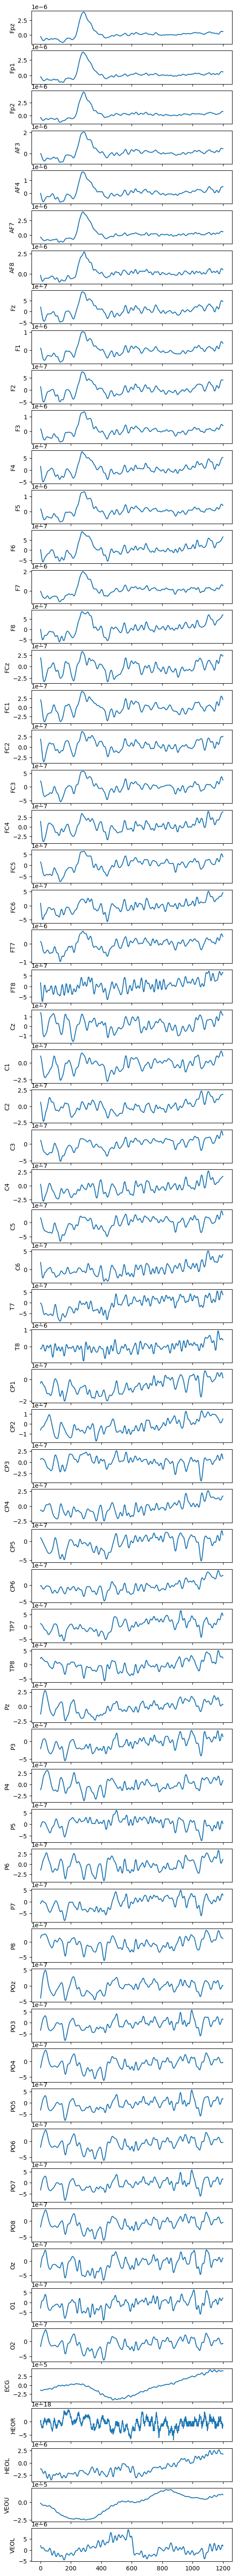

In [54]:
# 创建竖向子图
n_ch = len(rawData['má'][0])
channel_names = raw.info['ch_names']
fig, axes = plt.subplots(n_ch, 1, figsize=(6, 1.2 * n_ch), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(rawData['mā'][3][i], color='tab:blue')
    ax.set_ylabel(channel_names[i])
plt.show()

In [59]:
import numpy as np
import matplotlib.pyplot as plt

PINYIN_TEXT   = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]
for pinyin in PINYIN_TEXT:
    # ====== 1️⃣ 提取并计算统计量 ======
    epochs = np.array(rawData[pinyin])              # shape: (n_epochs, n_channels, n_times)
    mean_wave = epochs.mean(axis=0)             # (n_channels, n_times)
    std_wave  = epochs.std(axis=0)              # (n_channels, n_times)
    # 如果你想画方差，可用 var_wave = epochs.var(axis=0)

    # ====== 2️⃣ 时间轴 ======
    sfreq = raw.info['sfreq']
    n_ch, n_times = mean_wave.shape
    times = np.arange(n_times) / sfreq
    channel_names = raw.info['ch_names'][:n_ch]

    # ====== 3️⃣ 绘制平均 ± 方差波形 ======
    fig, axes = plt.subplots(n_ch, 1, figsize=(6, 1.2 * n_ch), sharex=True)

    for i, ax in enumerate(axes):
        mean_uV = mean_wave[i] * 1e6       # 转为 µV 单位
        std_uV  = std_wave[i] * 1e6

        # 均值线
        ax.plot(times, mean_uV, color='tab:blue', linewidth=1.2, label='Mean')
        # ±标准差阴影区域
        ax.fill_between(times, mean_uV - std_uV, mean_uV + std_uV,
                        color='skyblue', alpha=0.4, label='±1 SD')
        # 基线
        ax.axhline(0, color='k', linestyle='--', linewidth=0.5)
        
        # 标签
        ax.set_ylabel(channel_names[i], rotation=0, labelpad=25, fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.3)
        if i < n_ch - 1:
            ax.set_xticks([])
        else:
            ax.set_xlabel('Time (s)', fontsize=10)

    fig.suptitle(f"Average EEG Waveforms ± SD ({pinyin})", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"output_pic/{pinyin}_Average EEG Waveforms.png")



In [11]:
data = raw.get_data()  # shape (n_channels, n_times)
print("min:", data.min(), "max:", data.max(), "std:", data.std())
# 通道名
print(raw.ch_names)

# 采样率
print(raw.info['sfreq'])

# 通道类型与单位
for ch in raw.info['chs']:  # 前5个
    print(ch['ch_name'], ch['unit'], ch['unit_mul'])

min: -0.0006132676309671972 max: 0.001105432455844802 std: 7.671361931136274e-06
['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2', 'ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']
1000.0
Fpz 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
Fp1 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
Fp2 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF3 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF4 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF7 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF8 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
Fz 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
F1 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
F2 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
F3 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
F4 107 (FIFF_UNIT_V) 0 (FIFF_

(64, 50442)
Data shape: (64, 50442)
EEG channels: 64
Creating RawArray with float64 data, n_channels=64, n_times=50442
    Range : 0 ... 50441 =      0.000 ...    50.441 secs
Ready.
检测到坏道: ['HEOR']
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_828486/2505839013.py:19: RuntimeWarning: DigMontage is only a subset of info. There are 5 channel positions not present in the DigMontage. The channels missing from the montage are:

['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  testRaw.set_montage(montage, match_case=False, on_missing='warn')


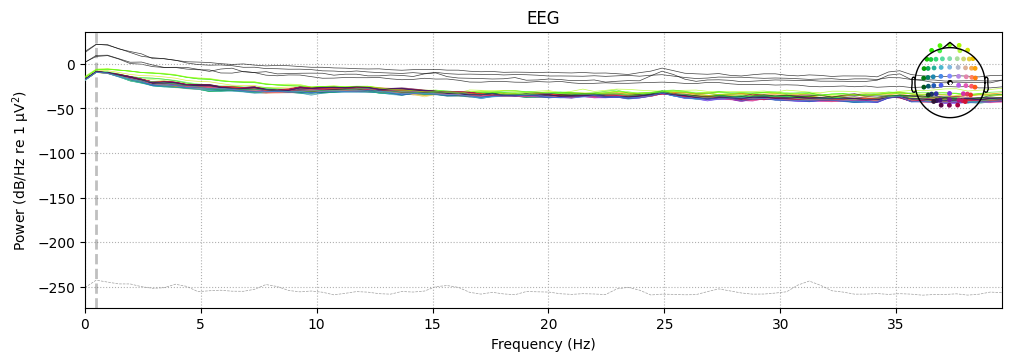

In [70]:
# 取出第一个epoch数据
data = np.hstack(rawData['mā'] ) # shape (n_channels, n_times)
print(data.shape)
print("Data shape:", data.shape)

# 匹配info
info = mne.pick_info(raw.info, mne.pick_types(raw.info, eeg=True))
print("EEG channels:", len(info['ch_names']))

# 检查维度一致性
if data.shape[0] != len(info['ch_names']):
    raise ValueError(f"通道数不匹配: data={data.shape[0]} vs info={len(info['ch_names'])}")

# 构建Raw对象
testRaw = mne.io.RawArray(data, info)

# 设置标准10-20电极位置信息
montage = mne.channels.make_standard_montage('standard_1020')
testRaw.set_montage(montage, match_case=False, on_missing='warn')

# 检查是否有坏道
zero_chs = [ch for ch in testRaw.ch_names if np.allclose(testRaw.get_data(picks=ch), 0)]
if zero_chs:
    testRaw.info['bads'].extend(zero_chs)
    print("检测到坏道:", zero_chs)

# # 绘制PSD与原始波形
# testRaw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
# testRaw.plot(duration=5, n_channels=30)
testRaw.set_eeg_reference('average', projection=False)
# testRaw.filter(0.5, 40., fir_design='firwin')
testRaw.compute_psd(fmax=40).plot()

In [13]:
testRaw

<RawArray | 64 x 50442 (50.4 s), ~24.7 MiB, data loaded>

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


<Figure size 640x480 with 0 Axes>

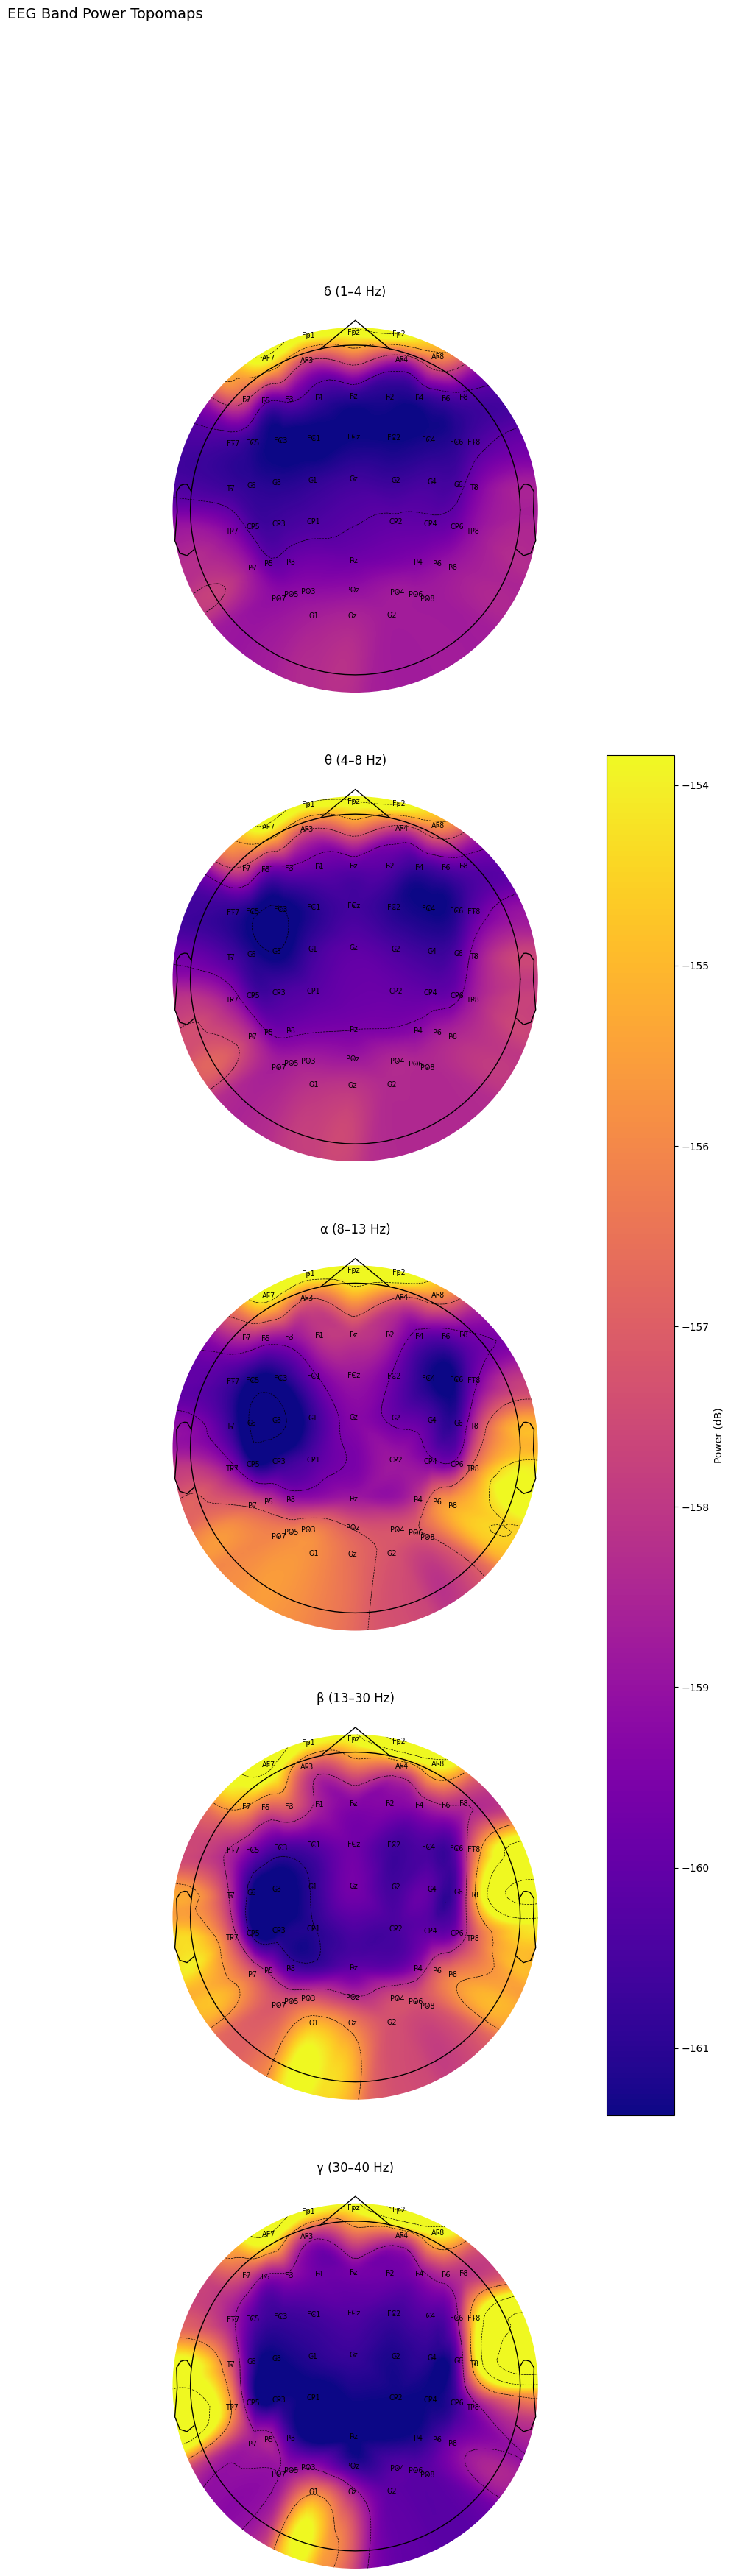

In [84]:

# 定义四个经典脑电频段
bands = {
    'δ (1–4 Hz)': (1, 4),
    'θ (4–8 Hz)': (4, 8),
    'α (8–13 Hz)': (8, 13),
    'β (13–30 Hz)': (13, 30),
    'γ (30–40 Hz)': (30, 40)
}

# 排除非EEG通道
exclude_chs = ["ECG", "HEOR", "HEOL", "VEOU", "VEOL"]
picks = [ch for ch in testRaw.info['ch_names'] if ch not in exclude_chs and ch not in testRaw.info['bads']]
info_eeg = mne.pick_info(testRaw.info, mne.pick_channels(testRaw.info['ch_names'], picks))

# 创建图形窗口（竖排 4 张）
plt.clf()
fig, axes = plt.subplots(len(bands), 1, figsize=(24, 40))

for ax, (band_name, (fmin, fmax)) in zip(axes, bands.items()):
    # 计算该频段的PSD并取平均功率
    psd = testRaw.compute_psd(fmin=fmin, fmax=fmax, picks=picks, method='welch')
    psd_data = psd.get_data()                     # (n_channels, n_freqs)
    band_power = psd_data.mean(axis=1)            # 平均功率 (n_channels,)
    band_power_db = 10 * np.log10(band_power)     # 转为 dB 单位

    # 绘制 topomap
    im, _ = mne.viz.plot_topomap(
        band_power_db, info_eeg,
        axes=ax,
        show=False,
        cmap='plasma',
        contours=4,
        vlim=(np.percentile(band_power_db, 5),np.percentile(band_power_db, 95)),
        names=info_eeg.ch_names,     # ✅ 通道名列表
    )
    ax.set_title(band_name, fontsize=12)

# 统一添加一个 colorbar
fig.colorbar(im, ax=axes, shrink=0.6, pad=0.05, label='Power (dB)')
fig.suptitle("EEG Band Power Topomaps", fontsize=14)
# plt.tight_layout()
plt.show()


In [18]:
# save rawData

np.save( 'speech_decoding_epochs.npy',rawData)
print('save done!')

save done!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ---------------------------
# 1️⃣ 加载你的数据
# ---------------------------
# 假设 data_dict 的格式为 {class_label: np.ndarray(samples, channels, timepoints)}
# 例如：{1: array(...), 2: array(...)}
data_dict = np.load("speech_decoding_epochs.npy", allow_pickle=True).item()  # 如果你保存成npy
for k in data_dict:
    data_dict[k] = np.array(data_dict[k])

channel_names = raw.info['ch_names']
selected_channels = ["T7", "TP7", "FT7", "CP5", "F7", "F5", "FC5", "F3", "F4", "Fz", "FCz", "T8", "TP8", "FT8"]

42
42
42
42
42
42
42
42
Data shape: (336, 76864) Labels: [1 2 3 4 5 6 7 8]


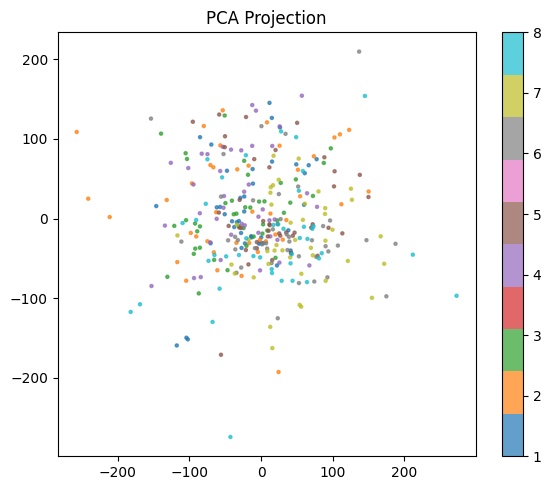

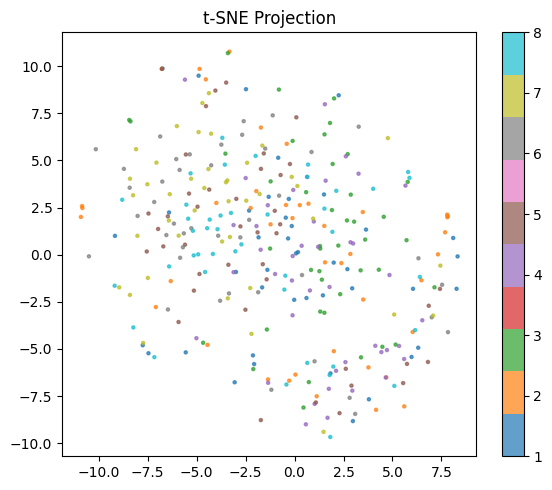

/home/liuqi/.conda/envs/sleep/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


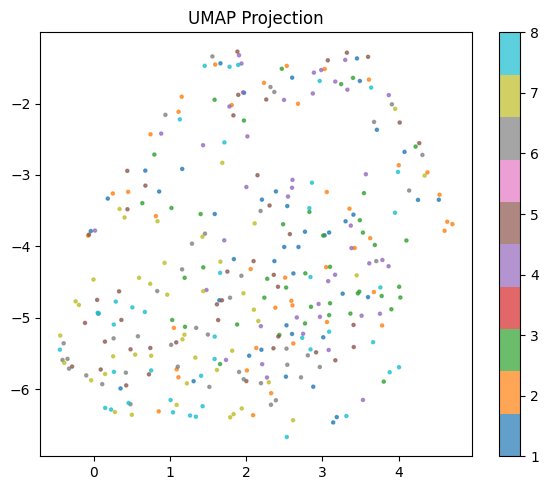

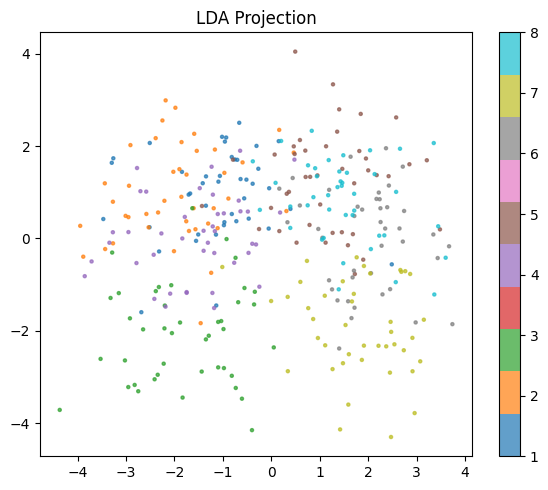


SVM (RBF) Accuracy: 0.2059
              precision    recall  f1-score   support

           1      0.136     0.429     0.207         7
           2      1.000     0.154     0.267        13
           3      0.000     0.000     0.000         9
           4      0.267     0.500     0.348         8
           5      0.250     0.125     0.167         8
           6      0.091     0.250     0.133         4
           7      0.250     0.250     0.250         8
           8      1.000     0.091     0.167        11

    accuracy                          0.206        68
   macro avg      0.374     0.225     0.192        68
weighted avg      0.463     0.206     0.197        68


Random Forest Accuracy: 0.2353
              precision    recall  f1-score   support

           1      0.167     0.286     0.211         7
           2      0.222     0.154     0.182        13
           3      0.300     0.333     0.316         9
           4      0.833     0.625     0.714         8
           5      

In [20]:

# 构造样本与标签
X_list, y_list = [], []
for label, arr in data_dict.items():
    n_samples = arr.shape[0]
    print(n_samples)
    X_list.append(arr.reshape(n_samples, -1))  # 展开每个样本
    y_list.append(np.full(n_samples, label))

X = np.vstack(X_list)
y = np.concatenate(y_list)

mapping  = {"mā":1, "má":2, "mǎ":3, "mà":4, "mī":5, "mí":6, "mǐ":7, "mì":8}
f = np.vectorize(lambda x: mapping[x])
y = f(y)
print("Data shape:", X.shape, "Labels:", np.unique(y))

# ---------------------------
# 2️⃣ 预处理
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 3️⃣ 降维与可视化
# ---------------------------
def plot_embedding(embedding, title, labels):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap="tab10", s=5, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_embedding(X_pca, "PCA Projection", y)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plot_embedding(X_tsne, "t-SNE Projection", y)

# UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
plot_embedding(X_umap, "UMAP Projection", y)

# LDA (必须有标签监督)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
plot_embedding(X_lda, "LDA Projection", y)

# ---------------------------
# 4️⃣ 分类性能测试
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "SVM (RBF)": SVC(kernel='rbf', C=1.0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

_acc_list = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=3))
    _acc_list.append(acc)

# ---------------------------
# 5️⃣ 可选：交叉验证
# ---------------------------
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} CV mean acc: {scores.mean():.4f} ± {scores.std():.4f}")
    

